In [2]:
# E-Commerce Sales Analytics and Automated Reporting Dashboard

# Objective:
# Analyze e-commerce sales dataset
# Perform SQL analysis
# Create visualizations
# Generate automated reports

This project analyzes an e-commerce sales dataset to extract business insights using Python, SQL, and data visualization techniques. The goal is to automate reporting and identify revenue trends, top products, and regional sales performance.


Performed preprocessing including duplicate removal, date formatting, and missing value handling to improve dataset reliability.


Stored cleaned data in SQLite database and executed SQL queries to derive revenue metrics and business insights.


Generated charts to visualize monthly revenue trends, top-performing products, and regional sales distribution.


Developed Python scripts to automatically generate summary reports and export results to CSV files.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!pip install pandas matplotlib seaborn

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Sample - Superstore.csv",encoding = "latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
#deletes duplicate rows
df = df.drop_duplicates()

#converts order date to date time
df['Order Date'] = pd.to_datetime(df['Order Date'])

#converts ship date to date time
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#remove all the missing values
df.dropna()

print("Data cleaned successfully")

Data cleaned successfully


In [12]:
df.to_csv("cleaned_Superstore.csv", index = False)

In [13]:
conn = sqlite3.connect("sales.db")

df.to_sql("sales",conn, if_exists="replace",index = False)

print ("Database created successfully")

Database created successfully


In [14]:
query = "SELECT SUM(Sales) as Total_Revenue from sales"

pd.read_sql(query,conn)

,Total_Revenue
0,2.297201e+06


In [16]:
#MONTHLY SALES TREND

query = """
SELECT strftime('%Y-%m',"Order Date") AS Month,
       SUM(Sales) AS Revenue
FROM sales
GROUP BY Month
ORDER BY Month
"""

monthly_sales = pd.read_sql(query,conn)
monthly_sales.head()

,Month,Revenue
0,2014-01,14236.895
1,2014-02,4519.892
2,2014-03,55691.009
3,2014-04,28295.345
4,2014-05,23648.287


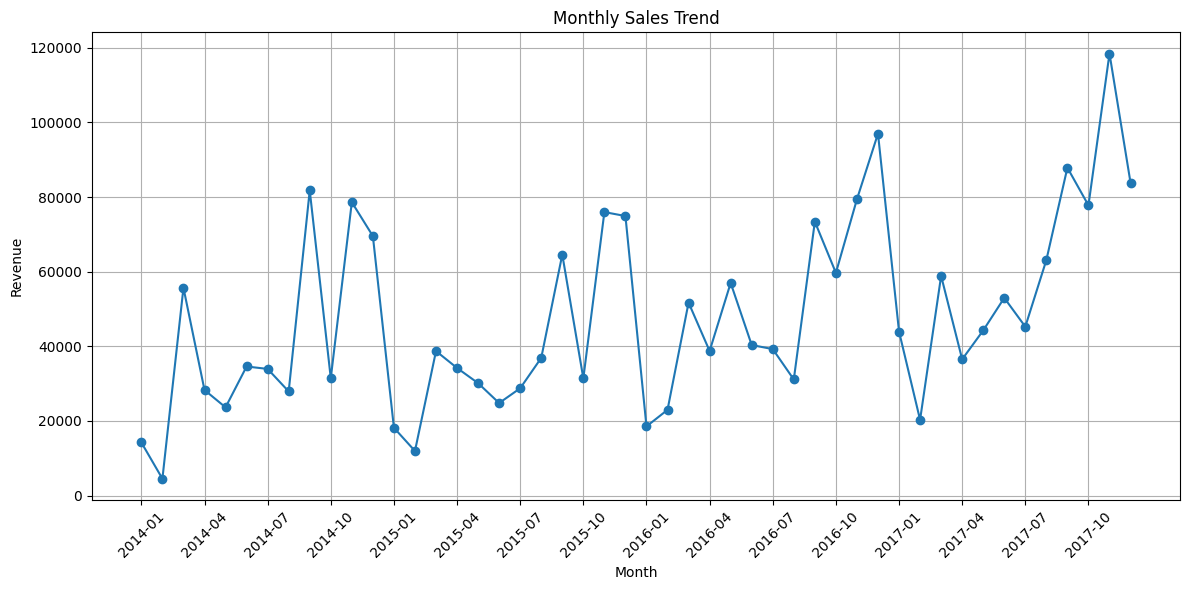

In [19]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'],monthly_sales['Revenue'],marker = 'o')

plt.xticks(monthly_sales['Month'][::3],rotation = 45)

plt.title("Monthly Sales Trend")
plt.xlabel('Month')
plt.ylabel('Revenue')

plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
#TOP SELLING PRODUCTS

query = """
SELECT "Product Name", SUM(Sales) AS TotalSales
FROM sales
GROUP BY "Product Name"
ORDER BY TotalSales DESC
LIMIT 10
"""

top_products = pd.read_sql(query,conn)

top_products

,Product Name,TotalSales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


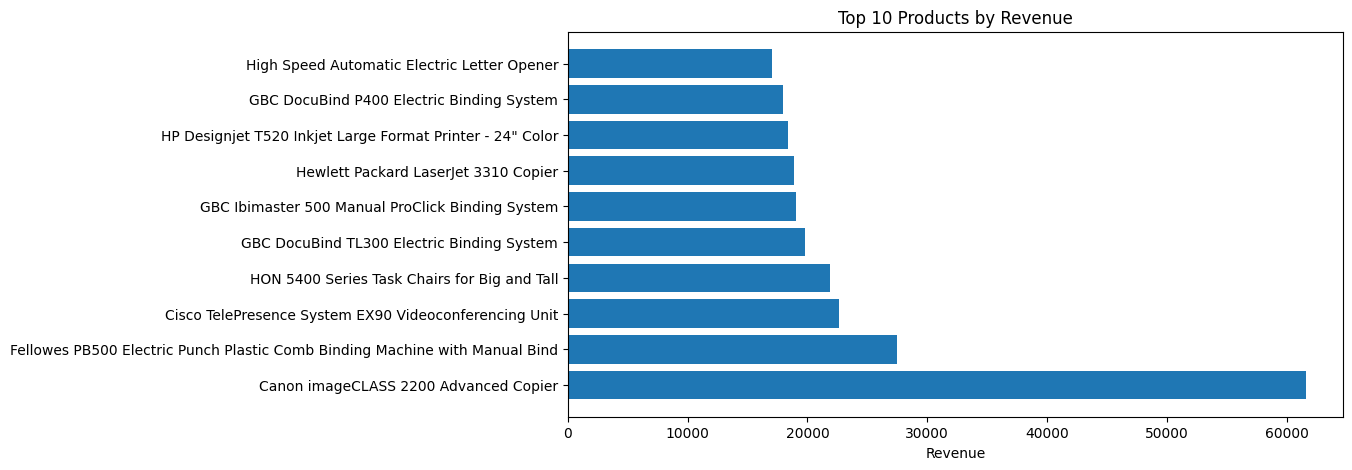

In [24]:
plt.figure(figsize=(10,5))

plt.barh(top_products['Product Name'],top_products['TotalSales'])
plt.title("Top 10 Products by Revenue")

plt.xlabel('Revenue')

plt.show()

In [25]:
#REGION WISE SALES

query = """
SELECT Region, SUM(Sales) AS Revenue
FROM sales
GROUP BY REGION
"""

region_sales = pd.read_sql(query,conn)

region_sales

,Region,Revenue
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


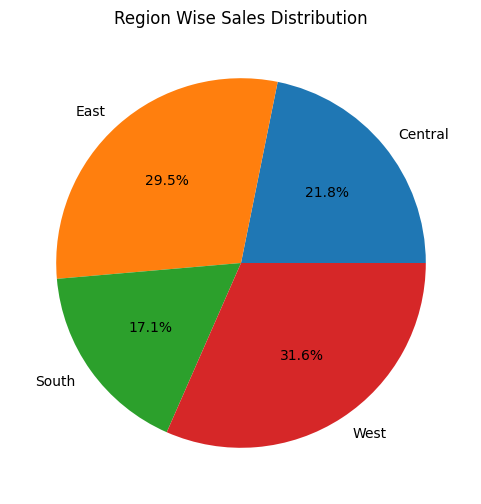

In [28]:
plt.figure(figsize=(6,6))
plt.pie(region_sales['Revenue'],
        labels = region_sales['Region'],
        autopct = '%1.1f%%')

plt.title("Region Wise Sales Distribution")

plt.show()

In [30]:
monthly_sales.to_csv("monthly_sales_report.csv",index = False)

top_products.to_csv("top_products_report.csv",index = False)

region_sales.to_csv("region_sales_report.csv",index = False)

print ("Reports generated successfully")

Reports generated successfully
